In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Ames Housing Dataset: Exploratory Data Analysis and Insights

This notebook performs an in-depth exploratory data analysis (EDA) of the Ames Housing dataset, focusing on understanding key factors influencing house prices. The analysis identifies important features, examines correlations, and visualizes relationships between various attributes and the target variable, `SalePrice`.

## Key Objectives:
1. **Dataset Overview:**
   - Load the dataset and provide a summary of its shape and missing values.

2. **Correlation Analysis:**
   - Identify numerical features most correlated with `SalePrice`.
   - Visualize correlations using a heatmap.

3. **Distribution of SalePrice:**
   - Analyze the distribution of `SalePrice` and apply a log transformation to normalize it.

4. **Missing Value Analysis:**
   - Visualize missing values across the dataset to guide preprocessing steps.

5. **Feature Relationships:**
   - Examine how `SalePrice` varies with:
     - Neighborhood (`Neighborhood` vs. `SalePrice`)
     - Overall quality (`OverallQual` vs. `SalePrice`)
     - Total basement area (`TotalBsmtSF` vs. `SalePrice`)

6. **Insights:**
   - Highlight key findings about the dataset and prepare a list of important features for predictive modeling.

## Structure:
1. **Loading and Exploring the Dataset**
   - Basic shape, missing values, and summary statistics.

2. **Correlation and Visualization**
   - Heatmap to identify strong relationships between features.
   - Highlight features most correlated with `SalePrice`.

3. **Visualizing Key Features**
   - Distributions, boxplots, and scatterplots to understand trends and outliers.

4. **Insights for Modeling**
   - Select the most impactful features for building machine learning models.

This analysis lays the groundwork for predictive modeling by identifying critical variables and addressing potential preprocessing needs. It provides actionable insights for advanced regression techniques, such as Random Forests or Gradient Boosting, to predict house prices effectively.


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Basic dataset overview
print("Dataset Shape:", train.shape)
print("Missing Values Summary:\n", train.isnull().sum().sort_values(ascending=False).head(10))



Dataset Shape: (1460, 81)
Missing Values Summary:
 PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64


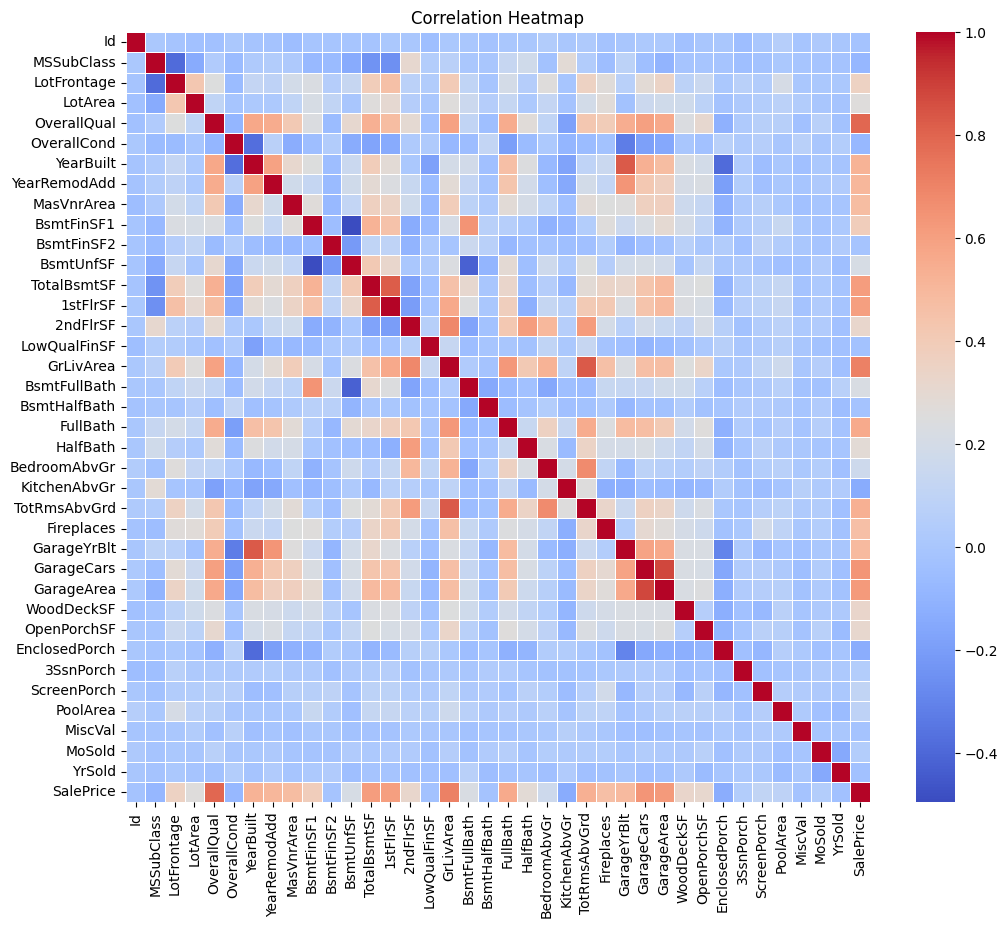

In [3]:

# Filter numeric columns for correlation analysis
numeric_cols = train.select_dtypes(include=["number"])
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Top Features Correlated with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


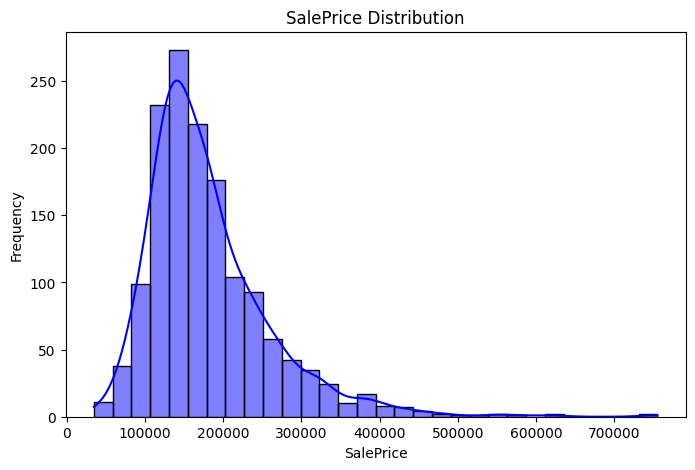

In [4]:

# Identify features most correlated with SalePrice
corr_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)
print("Top Features Correlated with SalePrice:\n", corr_with_saleprice.head(10))

# Plot distribution of SalePrice
plt.figure(figsize=(8, 5))
sns.histplot(train["SalePrice"], kde=True, color="blue", bins=30)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


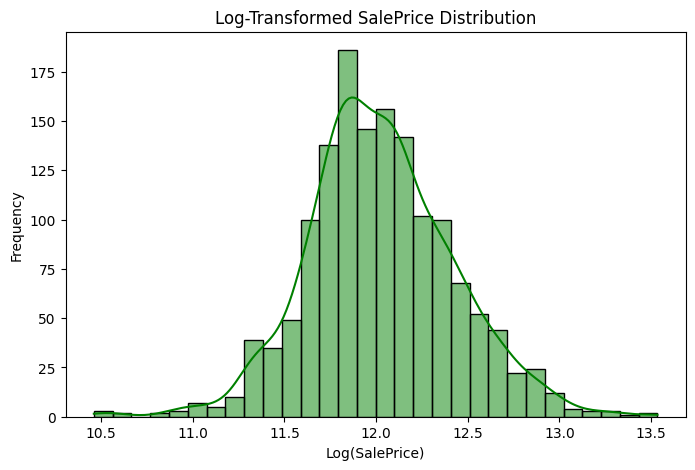

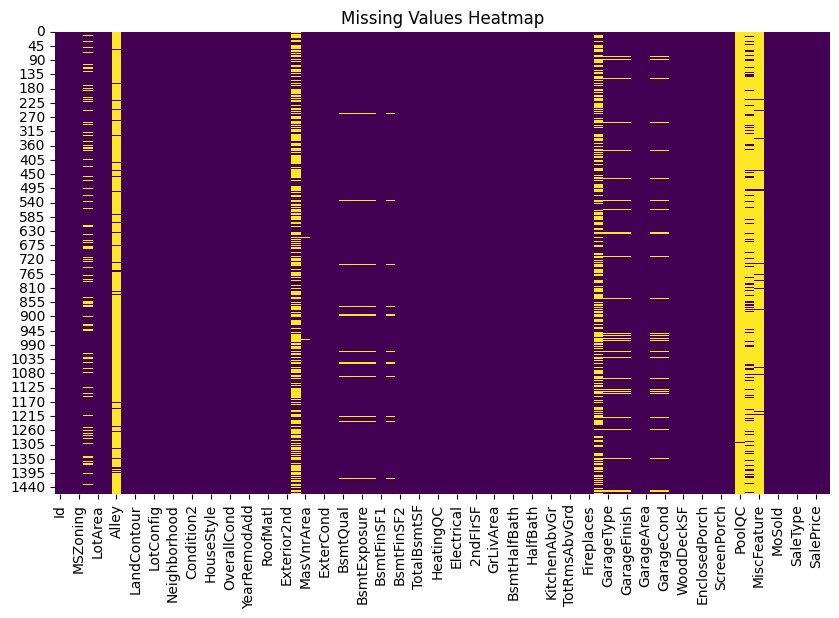

In [5]:

# Log-transform SalePrice and plot the distribution
train["LogSalePrice"] = np.log1p(train["SalePrice"])
plt.figure(figsize=(8, 5))
sns.histplot(train["LogSalePrice"], kde=True, color="green", bins=30)
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

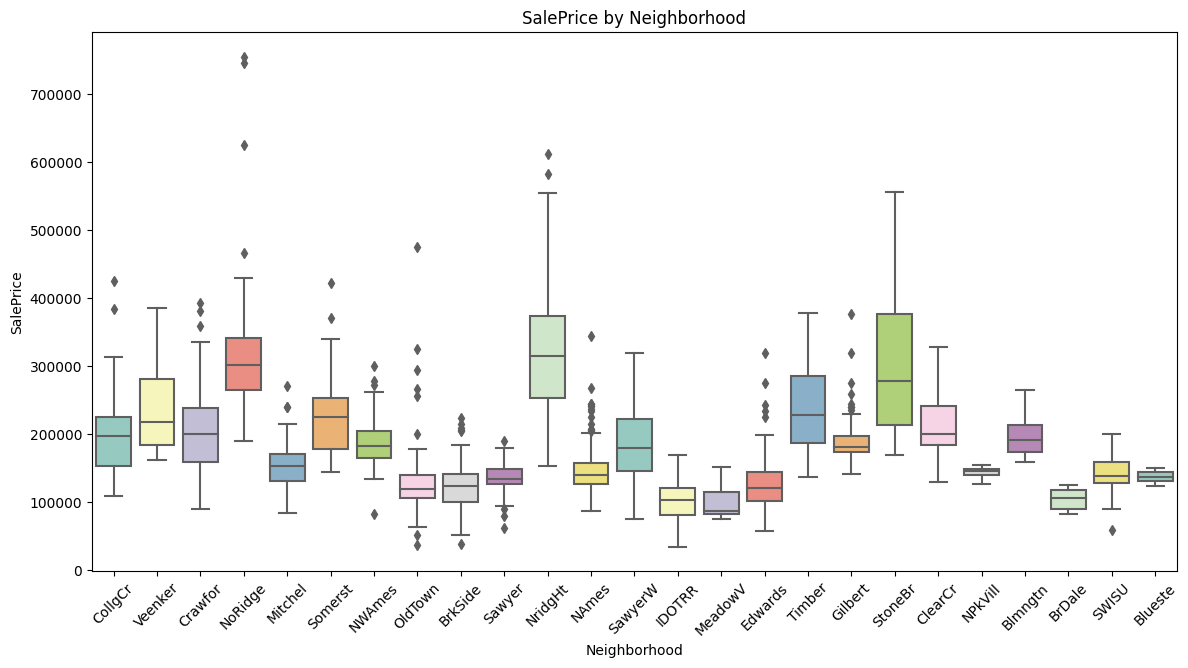

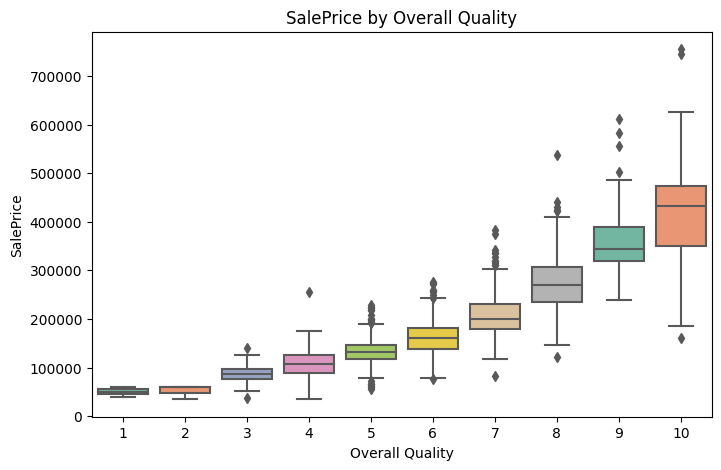

In [6]:

# Neighborhood vs SalePrice
plt.figure(figsize=(14, 7))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, palette="Set3")
plt.title("SalePrice by Neighborhood")
plt.xticks(rotation=45)
plt.show()

# OverallQual vs SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette="Set2")
plt.title("SalePrice by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

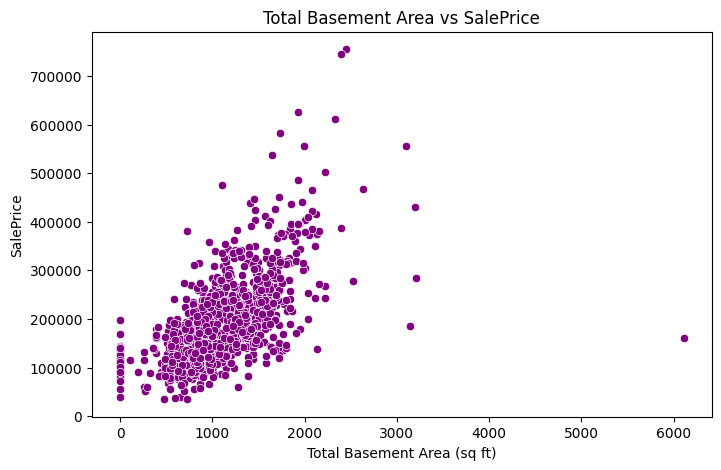

In [7]:

# TotalBsmtSF vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=train, color="purple")
plt.title("Total Basement Area vs SalePrice")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("SalePrice")
plt.show()


In [8]:

# Insights:
# 1. SalePrice is highly correlated with OverallQual and GrLivArea.
# 2. Neighborhood impacts house prices significantly, with some neighborhoods consistently having higher prices.
# 3. Log transformation of SalePrice normalizes its distribution.
# 4. Features like TotalBsmtSF and 1stFlrSF are also positively correlated with SalePrice.

# List of important features for modeling
important_features = corr_with_saleprice.index[1:11]
print("Selected Important Features for Modeling:\n", important_features.tolist())


Selected Important Features for Modeling:
 ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
